In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

You can download the user_training_dataset_update.csv from the link below:

https://drive.google.com/open?id=1tQGlNvkmGVPGcmQID2NNd5p8bkLBxofM

Import all the raw data files into python:

In [88]:
sessions_raw=pd.read_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/sessions.csv")
train_users_2_raw=pd.read_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/train_users_2.csv")
test_users_raw=pd.read_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/test_users.csv")
countries_raw=pd.read_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/countries.csv")
age_gender_bkts_raw=pd.read_csv("C:/Users/yuka.abe/Desktop/Airbnb Kaggle DataSet/age_gender_bkts.csv")

Exploratory Analysis on the sessions_raw dataset:

Description of the session_raw (session log data) data frame:

- 135,483 unique users in total in dataset
- 10 types of actions taken
- 359 unique actions taken
- 14 unique device types
- Average sessions duration (secs_elapsed) ranges from 0 to 1.799977e+06 with mean of 1.940581e+04 and standard deviatio of 8.888424e+04


In [33]:
sessions_raw.describe(include='all')

,user_id,action,action_type,action_detail,device_type,secs_elapsed
count,10533241,10488111,9441533,9441533,10567737,1.043171e+07
unique,135483,359,10,155,14,NaN
top,mxqbh3ykxl,show,view,view_search_results,Mac Desktop,NaN
freq,2722,2768278,3560902,1776885,3594286,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.940581e+04
std,NaN,NaN,NaN,NaN,NaN,8.888424e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2.290000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.147000e+03
75%,NaN,NaN,NaN,NaN,NaN,8.444000e+03


Types of action types, actions and action details:

Sessions by action type:

In [10]:
sessions_raw.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [89]:
sessions_raw.action.value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
ajax_refresh_subtotal         487744
update                        365130
similar_listings              364624
social_connections            339000
reviews                       320591
active                        188036
similar_listings_v2           168788
lookup                        162041
create                        155887
dashboard                     152952
header_userpic                141830
collections                   124417
edit                          109083
campaigns                     105028
track_page_view                81117
unavailabilities               78317
qt2                            64651
notifications                  59392
confirm_email                  58726
requested                      57034
identity                       53631
ajax_check_dates               52517
s

Create a new dataframe to include the activity count by user:

In [91]:
user_activity_count=sessions_raw.groupby('user_id').size()
user_activity_count=user_activity_count.reset_index()
user_activity_count=user_activity_count.rename(columns={0: 'session count'})
user_activity_count.sort_values(by='session count', ascending=False, inplace=True)
user_activity_count.head()

,user_id,session count
86383,mxqbh3ykxl,2722
1847,0hjoc5q8nf,2644
84873,mjbl6rrj52,2476
79804,l5lgm3w5pc,2424
122057,wg9413iaux,2362


Create a new dataframe to include the total time spent on Airbnb by user:

In [102]:
user_total_time_spent=sessions_raw.groupby('user_id')['secs_elapsed'].sum()
user_total_time_spent=user_total_time_spent.reset_index()
user_total_time_spent=user_total_time_spent.rename(columns={'secs_elapsed': 'Total time spent (in seconds)'})
user_total_time_spent.sort_values(by='Total time spent (in seconds)', ascending=False, inplace=True)
user_total_time_spent.head()

,user_id,Total time spent (in seconds)
81457,llvyczd9hn,38221363.0
131054,yu5bdalz2b,31393292.0
125353,xboy92k1s2,29469461.0
123975,wyv1imf8qw,28960128.0
59591,fsa2gw8kk4,26647578.0


Understand the distribution of the activity counts of the users:
-  Overall 135,483 users in the dataset
- 75% of users have less than or equal to 95 activity counts. There are some outlier in the activity count per user

In [104]:
user_activity_count['session count'].describe()

count    135483.000000
mean         77.745850
std         112.563746
min           1.000000
25%          16.000000
50%          41.000000
75%          95.000000
max        2722.000000
Name: session count, dtype: float64

(array([8.0373e+04, 2.6470e+04, 1.2113e+04, 6.2810e+03, 3.5020e+03,
        2.1390e+03, 1.2840e+03, 9.3400e+02, 6.2600e+02, 4.7100e+02,
        3.4100e+02, 2.0900e+02, 1.5200e+02, 1.3800e+02, 7.3000e+01,
        6.8000e+01, 6.5000e+01, 4.6000e+01, 2.6000e+01, 4.1000e+01,
        2.1000e+01, 1.9000e+01, 1.8000e+01, 7.0000e+00, 9.0000e+00,
        1.4000e+01, 3.0000e+00, 4.0000e+00, 6.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 5.54200e+01, 1.09840e+02, 1.64260e+02, 2.18680e+02,
        2.73100e+02, 3.27520e+02, 3.81940e+02, 4.36360e+02, 4.90780e+02,
        5.45200e+02, 5.99620e+02, 6.54040e+02, 7.08460e+02, 7.62880e+02,
        8.17300e+02, 8.71720e+02, 9.26140e+02, 9.80560e+02, 1.03498e+03,
        1.08940e+03, 1.143

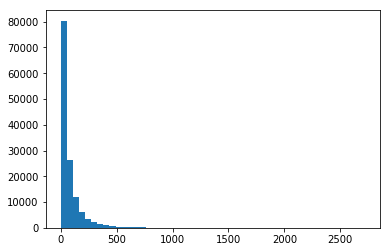

In [106]:
plt.hist(user_activity_count['session count'], bins=50)

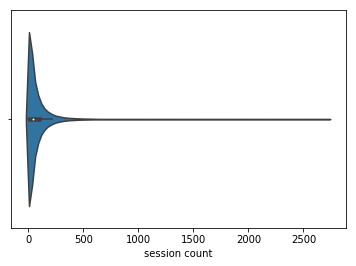

In [107]:
sns.violinplot(user_activity_count['session count'])

In [120]:
1.489732e+06/3600

413.81444444444446

Show the distribution of the user session table:
- Data is left skewed. half of the users has spent up to 236 hours. 75% of the users have spent 556 hours.
- On average, users have spent around 414 hours.
- By looking at the data, the second_elapsed field looks more like the open browser time rather than the actual time users have spent


In [109]:
user_total_time_spent['Total time spent (in seconds)'].describe()

count    1.354830e+05
mean     1.489732e+06
std      1.892923e+06
min      0.000000e+00
25%      2.605980e+05
50%      8.502710e+05
75%      2.000422e+06
max      3.822136e+07
Name: Total time spent (in seconds), dtype: float64

In [112]:
user_total_time_spent['Total time spent (in seconds)']=pd.to_numeric(user_total_time_spent['Total time spent (in seconds)'])

(array([1.22782e+05, 1.04340e+04, 1.75500e+03, 3.81000e+02, 9.30000e+01,
        2.60000e+01, 8.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([       0. ,  3822136.3,  7644272.6, 11466408.9, 15288545.2,
        19110681.5, 22932817.8, 26754954.1, 30577090.4, 34399226.7,
        38221363. ]),
 <a list of 10 Patch objects>)

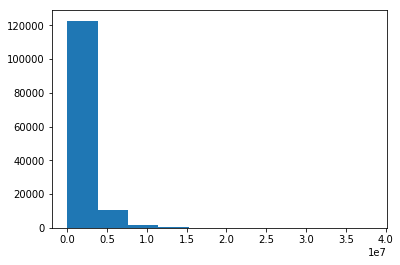

In [113]:
plt.hist(user_total_time_spent['Total time spent (in seconds)'])

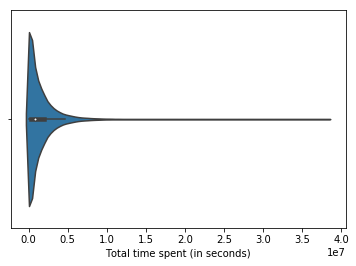

In [123]:
sns.violinplot(user_total_time_spent['Total time spent (in seconds)'])

Data Cleaning and data exploratory analysis on the user data:

In [124]:
train_users_2_raw.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

Clean up all the date and timestamp fields from the train_users_2_raw data frame:

In [181]:
train_users_2_raw['date_account_created']=pd.to_datetime(train_users_2_raw['date_account_created'])
train_users_2_raw['date_first_booking']=pd.to_datetime(train_users_2_raw['date_first_booking'])
train_users_2_raw['timestamp_first_active_cleaned']=pd.to_datetime(train_users_2_raw['timestamp_first_active'].apply(lambda x: str(x)[:8]).apply(lambda x: str(x)[:4]) +'-'+ train_users_2_raw['timestamp_first_active'].apply(lambda x: str(x)[:8]).apply(lambda x: str(x)[4:6]) + '-' + train_users_2_raw['timestamp_first_active'].apply(lambda x: str(x)[:8]).apply(lambda x: str(x)[6:]))

Make sure the user training dataset is at the user id level

In [182]:
user_training_dataset_check_duplicate_df=train_users_2_raw.groupby('id').size().reset_index()

In [183]:
user_training_dataset_check_duplicate_df.loc[user_training_dataset_check_duplicate_df[0]>1]

,id,0


There's no duplicate data by user id in the user training user dataset so the data is clean.

Find out if there's any user in the dataset that does not have the country destination

In [184]:
train_users_2_raw.loc[pd.isnull(train_users_2_raw['country_destination'])]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,timestamp_first_active_cleaned


In [185]:
train_users_2_raw['date_first_booking'].head()

0          NaT
1          NaT
2   2010-08-02
3   2012-09-08
4   2010-02-18
Name: date_first_booking, dtype: datetime64[ns]

Create new variable number_of_days_account_creation: number of days since the account has been created (number of days between date_account_created and date_first_booking)

In [186]:
train_users_2_raw['number_of_days_account_creation']=train_users_2_raw['date_first_booking']-train_users_2_raw['date_account_created']

Create new variable number_of_active_days: number of days since the user has been active (number of days between timestamp_first_active_cleaned and date_first_booking )

In [187]:
train_users_2_raw['number_of_active_days']=train_users_2_raw['date_first_booking']-train_users_2_raw['timestamp_first_active_cleaned']

Data Exploratory analysis on the train_user_data:

213,451 users in total in the user training dataset. 
The fields below have missing values:
- date_first_booking     
- number_of_days_account_creation     
- number_of_active_days               
- first_affiliate_tracked  

In [194]:
train_users_2_raw.count()

id                                 213451
date_account_created               213451
timestamp_first_active             213451
date_first_booking                  88908
gender                             213451
age                                125461
signup_method                      213451
signup_flow                        213451
language                           213451
affiliate_channel                  213451
affiliate_provider                 213451
first_affiliate_tracked            207386
signup_app                         213451
first_device_type                  213451
first_browser                      213451
country_destination                213451
timestamp_first_active_cleaned     213451
number_of_days_account_creation     88908
number_of_active_days               88908
dtype: int64

User age field:

There's some outlier in the age field:

In [205]:
train_users_2_raw['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

There are 939 rows with age lower than 18 or over 122 years old.

In [206]:
train_users_2_raw.loc[(train_users_2_raw['age']>=122)|(train_users_2_raw['age']<18),'age'].count()

939

Create a field age_computed to compute the age lower than 18 to be 18 and the age over 122 to be 122 years old.

In [210]:
train_users_2_raw['age_computed']=train_users_2_raw['age']
train_users_2_raw.loc[train_users_2_raw['age_computed']>=122,'age_computed']=122
train_users_2_raw.loc[train_users_2_raw['age_computed']<18,'age_computed']=18

Below is the age histogram:
- The age histogram is left skewed.


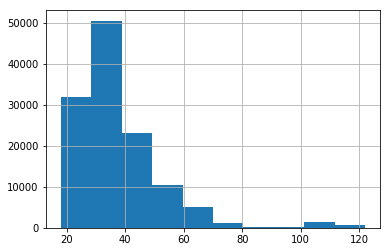

In [293]:
train_users_2_raw['age_computed'].hist(bins=10)

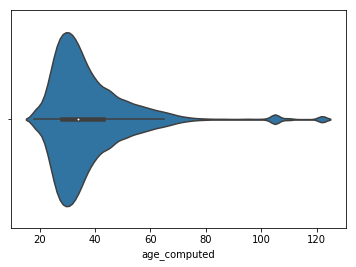

In [295]:
sns.violinplot(train_users_2_raw['age_computed'])

The average computed age of the user is around 38 years old. 50% of the users are up to 34 years old.

In [296]:
train_users_2_raw['age_computed'].describe()

count    125461.000000
mean         37.945736
std          15.405991
min          18.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         122.000000
Name: age_computed, dtype: float64

User Gender field:

In [213]:
train_users_2_raw['gender'].unique()                        

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

45% of the users have unknown gender, 30% of users are female, 26% of users are male

In [222]:
train_users_2_raw['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [217]:
train_users_2_raw.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination',
       'timestamp_first_active_cleaned', 'number_of_days_account_creation',
       'number_of_active_days', 'age_computed'],
      dtype='object')

User signup method field:
- 71% of users are signing up through regular approach
- 28% of users are signing up through Facebook


In [223]:
train_users_2_raw['signup_method'].unique()

array(['facebook', 'basic', 'google'], dtype=object)

In [227]:
train_users_2_raw['signup_method'].value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

User signup_flow field:

77% of users have 0 sign-up flow

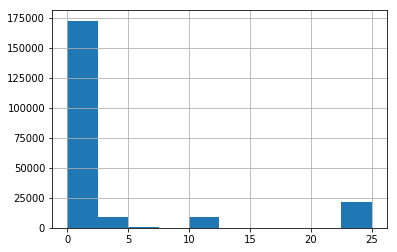

In [229]:
train_users_2_raw['signup_flow'].hist()

In [230]:
train_users_2_raw['signup_flow'].value_counts()

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

User language field:

In [232]:
train_users_2_raw['language'].unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

97% of users have english as their browser language

In [233]:
train_users_2_raw['language'].value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

user affiliate_channel field:

8 types of affiliate channels in the dataset:

In [237]:
train_users_2_raw['affiliate_channel'].unique()

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

65% of the users came to the airbnb page through direct affiliate channel, 21% of users came to the airbnb page through sem (brand & non-brand)

In [238]:
train_users_2_raw['affiliate_channel'].value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

User affiliate_provider:

64% of users are from direct affiliate provider, 24% of users are from google affiliate provider

In [243]:
train_users_2_raw['affiliate_provider'].unique()

array(['direct', 'google', 'other', 'craigslist', 'facebook', 'vast',
       'bing', 'meetup', 'facebook-open-graph', 'email-marketing',
       'yahoo', 'padmapper', 'gsp', 'wayn', 'naver', 'baidu', 'yandex',
       'daum'], dtype=object)

In [257]:
train_users_2_raw['affiliate_provider'].value_counts()

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [258]:
train_users_2_raw['affiliate_provider'].value_counts()/train_users_2_raw['id'].count()

direct                 0.643829
google                 0.242177
other                  0.058791
craigslist             0.016261
bing                   0.010906
facebook               0.010649
vast                   0.003884
padmapper              0.003598
facebook-open-graph    0.002553
yahoo                  0.002324
gsp                    0.002122
meetup                 0.001626
email-marketing        0.000778
naver                  0.000244
baidu                  0.000136
yandex                 0.000080
wayn                   0.000037
daum                   0.000005
Name: affiliate_provider, dtype: float64

User first_affiliate_tracked field:

Note: Don't think this field could be a useful feature

In [260]:
train_users_2_raw.first_affiliate_tracked.unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

User signup_app field:

85% of users are signing up through Web

In [261]:
train_users_2_raw['signup_app'].unique()

array(['Web', 'Moweb', 'iOS', 'Android'], dtype=object)

In [262]:
train_users_2_raw['signup_app'].value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

In [265]:
train_users_2_raw['signup_app'].value_counts()/train_users_2_raw.id.count()

Web        0.856014
iOS        0.089102
Moweb      0.029332
Android    0.025552
Name: signup_app, dtype: float64

User first_device_type field:

- 42% of the uses go to airbnb from Mac Desktop as the first device.
- 34% of the users go to airbnb from Windows Desktop as the first device.
- 10% of the users go to airbnb from iPhone as the first device.


In [267]:
train_users_2_raw['first_device_type'].unique()

array(['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)'], dtype=object)

In [271]:
train_users_2_raw['first_device_type'].value_counts()

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [270]:
train_users_2_raw['first_device_type'].value_counts()/train_users_2_raw['id'].count()

Mac Desktop           0.419768
Windows Desktop       0.340668
iPhone                0.097254
iPad                  0.067177
Other/Unknown         0.049974
Android Phone         0.013132
Android Tablet        0.006053
Desktop (Other)       0.005617
SmartPhone (Other)    0.000356
Name: first_device_type, dtype: float64

User first_browser field:

30% of users use Chrome as the first browser, 21% use Sarafi as the first browser, 16% use Firefox as the first browser

In [273]:
train_users_2_raw['first_browser'].unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

In [276]:
train_users_2_raw['first_browser'].value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
Flock     

In [275]:
train_users_2_raw['first_browser'].value_counts()/train_users_2_raw['id'].count()

Chrome                  0.299108
Safari                  0.211613
Firefox                 0.157671
-unknown-               0.127739
IE                      0.098702
Mobile Safari           0.090297
Chrome Mobile           0.005950
Android Browser         0.003987
AOL Explorer            0.001148
Opera                   0.000881
Silk                    0.000581
Chromium                0.000342
BlackBerry Browser      0.000248
Maxthon                 0.000216
IE Mobile               0.000169
Apple Mail              0.000169
Sogou Explorer          0.000155
Mobile Firefox          0.000141
SiteKiosk               0.000112
RockMelt                0.000112
Iron                    0.000080
IceWeasel               0.000061
Pale Moon               0.000056
SeaMonkey               0.000052
CometBird               0.000052
Yandex.Browser          0.000052
Camino                  0.000042
TenFourFox              0.000037
wOSBrowser              0.000028
CoolNovo                0.000028
Avant Brow

In [277]:
train_users_2_raw.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination',
       'timestamp_first_active_cleaned', 'number_of_days_account_creation',
       'number_of_active_days', 'age_computed'],
      dtype='object')

user country_destination:

- 58% of users have chosen NDF
- 29% of users have chosen US 

In [279]:
train_users_2_raw['country_destination'].unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU'], dtype=object)

In [280]:
train_users_2_raw['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [281]:
train_users_2_raw['country_destination'].value_counts()/train_users_2_raw['id'].count()

NDF      0.583473
US       0.292226
other    0.047290
FR       0.023532
IT       0.013282
GB       0.010888
ES       0.010536
CA       0.006690
DE       0.004971
NL       0.003570
AU       0.002525
PT       0.001017
Name: country_destination, dtype: float64

User number_of_days_account_creation and number of active days:

In [285]:
train_users_2_raw['number_of_days_account_creation'].describe()

count                      88908
mean     44 days 08:41:59.854231
std      87 days 11:59:22.090141
min          -349 days +00:00:00
25%              1 days 00:00:00
50%              3 days 00:00:00
75%             29 days 00:00:00
max            365 days 00:00:00
Name: number_of_days_account_creation, dtype: object

Most of the users (up to 75%) make their bookings with 30 days after they are active on the website.

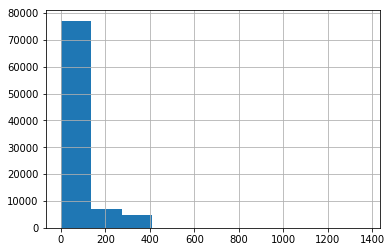

In [329]:
train_users_2_raw['number_of_active_days_numeric_value'].hist(bins=10)

In [315]:
train_users_2_raw['number_of_active_days'].describe()

count                      88908
mean     44 days 16:36:44.022135
std      88 days 11:35:12.574019
min              0 days 00:00:00
25%              1 days 00:00:00
50%              3 days 00:00:00
75%             29 days 00:00:00
max           1369 days 00:00:00
Name: number_of_active_days, dtype: object

Create classification variables called "Account_creation_before_booking_flag" :
- 0: Account creation after first booking
- 1: Account creation and first booking happened on the same day
- 2: Account creation before first booking


Convert the timedelta to number of days (numeric value):

In [316]:
train_users_2_raw['number_of_days_account_creation_numeric_value']=train_users_2_raw['number_of_days_account_creation'].dt.days
train_users_2_raw['number_of_active_days_numeric_value']=train_users_2_raw['number_of_active_days'].dt.days

In [317]:
train_users_2_raw.loc[train_users_2_raw['number_of_days_account_creation_numeric_value']==0,'Account_creation_before_booking_flag']=1
train_users_2_raw.loc[train_users_2_raw['number_of_days_account_creation_numeric_value']>0,'Account_creation_before_booking_flag']=2
train_users_2_raw.loc[train_users_2_raw['number_of_days_account_creation_numeric_value']<0,'Account_creation_before_booking_flag']=0


In [319]:
train_users_2_raw['Account_creation_before_booking_flag'].value_counts()

2.0    67475
1.0    21404
0.0       29
Name: Account_creation_before_booking_flag, dtype: int64

32% of the users create the account before the first booking, 10% of users created account after the first booking. The remaining users do not have the first booking date in the training dataset.

In [320]:
train_users_2_raw['Account_creation_before_booking_flag'].value_counts()/train_users_2_raw['id'].count()

2.0    0.316115
1.0    0.100276
0.0    0.000136
Name: Account_creation_before_booking_flag, dtype: float64

Merge the train_users_2_raw data frame and the user_activity_count dataframe and user_total_time_spent dataframe by user id:

In [336]:
user_activity_count['session count'].sum() ##10533241
user_total_time_spent['Total time spent (in seconds)'].sum() ##201833415029.0

10533241

In [354]:
user_final_training_dataset=pd.merge(left=train_users_2_raw, right=user_activity_count, left_on="id", right_on="user_id", how='left')
user_final_training_dataset=pd.merge(left=user_final_training_dataset, right=user_total_time_spent, left_on="id", right_on="user_id", how='left')

In [351]:
train_users_2_raw.shape

(213451, 23)

In [352]:
user_final_training_dataset.shape

(213451, 27)

In [355]:
user_final_training_dataset.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination',
       'timestamp_first_active_cleaned', 'number_of_days_account_creation',
       'number_of_active_days', 'age_computed',
       'number_of_days_account_creation_numeric_value',
       'number_of_active_days_numeric_value',
       'Account_creation_before_booking_flag', 'user_id_x', 'session count',
       'user_id_y', 'Total time spent (in seconds)'],
      dtype='object')

In [357]:
user_final_training_dataset['session count'].sum() ##10533241

5537957.0

In [359]:
user_final_training_dataset['Total time spent (in seconds)'].sum() ##201833415029.0

111773253498.0

Export the dataset user_final_training_dataset into csv file

In [360]:
#user_final_training_dataset.to_csv(
)